In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['1000genome-chameleon-2ch-100k-001.json',
'1000genome-chameleon-2ch-250k-001.json',
'1000genome-chameleon-4ch-100k-001.json',
'1000genome-chameleon-4ch-250k-001.json',
'1000genome-chameleon-6ch-100k-001.json',
'1000genome-chameleon-6ch-250k-001.json',
'1000genome-chameleon-8ch-100k-001.json',
'1000genome-chameleon-8ch-250k-001.json',
'1000genome-chameleon-10ch-100k-001.json',
'1000genome-chameleon-10ch-250k-001.json',
'1000genome-chameleon-12ch-100k-001.json',
'1000genome-chameleon-12ch-250k-001.json',
'1000genome-chameleon-14ch-100k-001.json',
'1000genome-chameleon-14ch-250k-001.json',
'1000genome-chameleon-16ch-100k-001.json',
'1000genome-chameleon-16ch-250k-001.json',
'1000genome-chameleon-18ch-100k-001.json',
'1000genome-chameleon-18ch-250k-001.json',
'1000genome-chameleon-20ch-100k-001.json',
'1000genome-chameleon-20ch-250k-001.json',
'1000genome-chameleon-22ch-100k-001.json',
'1000genome-chameleon-22ch-250k-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/1000genome/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

52
82
104
164
156
246
208
328
260
410
312
492
364
574
416
656
468
738
520
820
572
902


In [3]:
G_list[0]

In [9]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lbs= []
ubs = []

y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3
naives1 = []
naives2 = []
heur = []
for G in G_list:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive1, true, order =iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=2,iterations=1,homogeneous=True,verbose=False)
    # _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    # d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives1.append(naive1)
    #naives2.append(naive2)
    #print(naive1, naive2)
    # y.append(obj_opt)
    # lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)
    print("______________________________________________________")
 

______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
______________________________________________________
__________

In [4]:
print("x is \n", x)
print("ubs are \n", ubs)
print("naives1 are \n",naives1)
print("naives2 are \n", naives2)
print("heurs are \m",heur)

x is 
 [52, 82, 104, 164, 156, 246, 208, 328, 260, 410, 312, 492, 364, 574, 416, 656, 468, 738, 520, 820, 572, 902]
ubs are 
 [389.1886607044873, 779.1061115887866, 1071.326195620372, 2170.245666026469, 1951.843391785396, 3971.553622571799, 2991.9609253863277, 6101.643634907391, 4169.898042993444, 8516.201252049652, 5472.502076947365, 11187.037030033232, 6887.890857808032, 14089.472689799935, 8406.81522615652, 17206.012405524918, 10024.56175017469, 20525.18886766322, 11734.592283677368, 24033.508231299624, 13530.799328079109, 27720.49550281471]
naives1 are 
 [300.1511792159383, 586.324397539402, 833.0016729119018, 1637.8204004161248, 1520.3299894979493, 2996.112771203816, 2333.1977420763883, 4603.231325700344, 3254.09721046939, 6424.738272457003, 4271.755549529451, 8438.089949297793, 5378.0273596315255, 10626.851526379514, 6565.7850230022295, 12977.288222557536, 7830.000188650671, 15479.258730585114, 9166.63666567734, 18124.49013114077, 10571.37188150052, 20904.85592427351]
naives2 are

In [6]:
print(len(y))
print(len(x))

22
22


In [6]:
ratios1 = [n/h for n,h in zip(naives1, heur)]
print(ratios1)
ratios2 = [n/h for n,h in zip(naives2, heur)]
print(ratios2)

[1.000297530881072, 1.000225967920515, 1.0000316489260017, 1.0000220636740997, 1.0, 1.0, 1.0000514830388771, 1.0000354142254844, 1.0000158297712247, 1.000010573529146, 1.0, 1.0, 1.000028015578378, 1.0000188861500563, 1.0000104730409378, 1.0000069352326713, 1.0, 1.0, 1.0000192495879088, 1.0000128729848061, 1.0000078196472717, 1.0000051619167296]
[1.1730101891660216, 1.097644985452079, 1.3516832864632262, 1.248223423843088, 1.5276865059189908, 1.4029606518103772, 1.6890983933408277, 1.5467007397191799, 1.8382274143394135, 1.6800660010213075, 1.9770045176993234, 1.8044828800892974, 2.106867658277387, 1.9212064283666732, 2.2295035974491935, 2.03154035885378, 2.345954890001892, 2.1363834120807277, 2.4568923617511933, 2.236378198502531, 2.5631457311501293, 2.332188640850491]


In [2]:
ratios1 = [1.000297530881072, 1.000225967920515, 1.0000316489260017, 1.0000220636740997, 1.0, 1.0, 1.0000514830388771, 1.0000354142254844, 1.0000158297712247, 1.000010573529146, 1.0, 1.0, 1.000028015578378, 1.0000188861500563, 1.0000104730409378, 1.0000069352326713, 1.0, 1.0, 1.0000192495879088, 1.0000128729848061, 1.0000078196472717, 1.0000051619167296]
ratios2 = [1.1730101891660216, 1.097644985452079, 1.3516832864632262, 1.248223423843088, 1.5276865059189908, 1.4029606518103772, 1.6890983933408277, 1.5467007397191799, 1.8382274143394135, 1.6800660010213075, 1.9770045176993234, 1.8044828800892974, 2.106867658277387, 1.9212064283666732, 2.2295035974491935, 2.03154035885378, 2.345954890001892, 2.1363834120807277, 2.4568923617511933, 2.236378198502531, 2.5631457311501293, 2.332188640850491]


In [3]:
x = [52, 82, 104, 164, 156, 246, 208, 328, 260, 410, 312, 492, 364, 574, 416, 656, 468, 738, 520, 820, 572, 902]

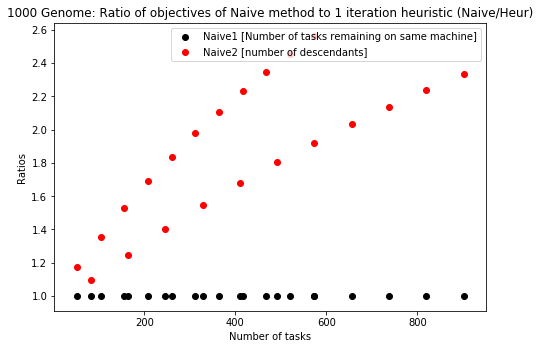

In [5]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive1 [Number of tasks remaining on same machine]', color='k')
plt.scatter(x, ratios2, label='Naive2 [number of descendants]', color='r')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.title("1000 Genome: Ratio of objectives of Naive method to 1 iteration heuristic (Naive/Heur)")
plt.legend()
plt.show()

In [11]:
import csv
with open("1000genome_both_naives_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "naive1", "heuristic", "upperbound"])
    writer.writerows(zip(x,  naives1, naives2, heur,  ubs))